In [37]:
import numpy as np
import keras
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from catboost import CatBoostRegressor
import geopy
from geopy import distance

In [2]:
data_path = 'D:/digital_lab/hackaton/'
df = pd.read_csv(data_path+'train.csv',nrows=1000000,header=0)
df.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## Données brutes :
train/test

In [3]:
from sklearn.model_selection import train_test_split
Y = df.fare_amount
X = df.drop(columns=['key','fare_amount','pickup_datetime'])
X.shape
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)

## Outliers
On enlève pour l'instant les outliers (moins de 0.1%)

In [4]:
df = df.dropna()
df.shape

(999990, 8)

In [5]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error
xg_reg = xgb.XGBRegressor(objective ='reg:squarederror')
xg_reg.fit(X_train,Y_train)

C:\Users\Arthur\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:squarederror',
             random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             seed=None, silent=None, subsample=1, verbosity=1)

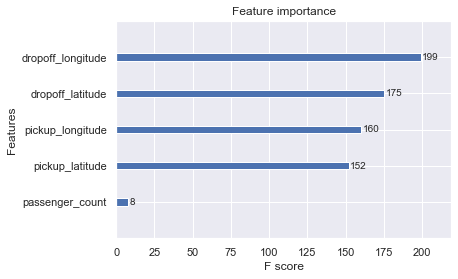

In [6]:
from xgboost import plot_importance
plot_importance(xg_reg)

In [7]:
from sklearn.metrics import mean_squared_error
from math import sqrt
y_pred = xg_reg.predict(X_test)
rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

5.7568837339631225

In [8]:
print(xg_reg.feature_importances_)

[0.32349366 0.1583695  0.38009515 0.13184562 0.00619602]


# Test de Catboost

In [9]:
model = CatBoostRegressor(iterations=1000, 
                          loss_function='RMSE',
                           early_stopping_rounds=3)
model.fit(X_train,
          Y_train,
          verbose=False)
y_pred = model.predict(X_test)
rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

0:	learn: 9.6256957	total: 166ms	remaining: 2m 45s
1:	learn: 9.4686711	total: 270ms	remaining: 2m 14s
2:	learn: 9.3183466	total: 376ms	remaining: 2m 4s
3:	learn: 9.1739708	total: 533ms	remaining: 2m 12s
4:	learn: 9.0354691	total: 678ms	remaining: 2m 15s
5:	learn: 8.9025835	total: 785ms	remaining: 2m 10s
6:	learn: 8.7755227	total: 897ms	remaining: 2m 7s
7:	learn: 8.6542732	total: 1.01s	remaining: 2m 4s
8:	learn: 8.5383448	total: 1.12s	remaining: 2m 3s
9:	learn: 8.4269763	total: 1.23s	remaining: 2m 1s
10:	learn: 8.3181450	total: 1.34s	remaining: 2m
11:	learn: 8.2161360	total: 1.44s	remaining: 1m 58s
12:	learn: 8.1180316	total: 1.56s	remaining: 1m 58s
13:	learn: 8.0246459	total: 1.71s	remaining: 2m
14:	learn: 7.9333008	total: 1.85s	remaining: 2m 1s
15:	learn: 7.8460826	total: 1.96s	remaining: 2m
16:	learn: 7.7618205	total: 2.07s	remaining: 1m 59s
17:	learn: 7.6838244	total: 2.17s	remaining: 1m 58s
18:	learn: 7.6104555	total: 2.28s	remaining: 1m 57s
19:	learn: 7.5387353	total: 2.38s	remain

158:	learn: 5.2192768	total: 18.4s	remaining: 1m 37s
159:	learn: 5.2153622	total: 18.5s	remaining: 1m 37s
160:	learn: 5.2117909	total: 18.6s	remaining: 1m 37s
161:	learn: 5.2079618	total: 18.7s	remaining: 1m 36s
162:	learn: 5.2042480	total: 18.9s	remaining: 1m 36s
163:	learn: 5.2013786	total: 19s	remaining: 1m 36s
164:	learn: 5.1992171	total: 19.1s	remaining: 1m 36s
165:	learn: 5.1964528	total: 19.2s	remaining: 1m 36s
166:	learn: 5.1945587	total: 19.3s	remaining: 1m 36s
167:	learn: 5.1911063	total: 19.4s	remaining: 1m 35s
168:	learn: 5.1892621	total: 19.5s	remaining: 1m 35s
169:	learn: 5.1855170	total: 19.6s	remaining: 1m 35s
170:	learn: 5.1837321	total: 19.8s	remaining: 1m 35s
171:	learn: 5.1816193	total: 19.9s	remaining: 1m 35s
172:	learn: 5.1784934	total: 20s	remaining: 1m 35s
173:	learn: 5.1745084	total: 20.1s	remaining: 1m 35s
174:	learn: 5.1702588	total: 20.2s	remaining: 1m 35s
175:	learn: 5.1672135	total: 20.4s	remaining: 1m 35s
176:	learn: 5.1640355	total: 20.5s	remaining: 1m 3

314:	learn: 4.9588694	total: 36.4s	remaining: 1m 19s
315:	learn: 4.9581082	total: 36.5s	remaining: 1m 19s
316:	learn: 4.9571450	total: 36.7s	remaining: 1m 19s
317:	learn: 4.9565695	total: 36.8s	remaining: 1m 18s
318:	learn: 4.9557184	total: 36.9s	remaining: 1m 18s
319:	learn: 4.9552330	total: 37s	remaining: 1m 18s
320:	learn: 4.9545877	total: 37.2s	remaining: 1m 18s
321:	learn: 4.9538187	total: 37.3s	remaining: 1m 18s
322:	learn: 4.9530248	total: 37.4s	remaining: 1m 18s
323:	learn: 4.9525423	total: 37.5s	remaining: 1m 18s
324:	learn: 4.9518970	total: 37.6s	remaining: 1m 18s
325:	learn: 4.9507172	total: 37.7s	remaining: 1m 17s
326:	learn: 4.9502155	total: 37.8s	remaining: 1m 17s
327:	learn: 4.9498458	total: 38s	remaining: 1m 17s
328:	learn: 4.9493883	total: 38.1s	remaining: 1m 17s
329:	learn: 4.9488475	total: 38.2s	remaining: 1m 17s
330:	learn: 4.9483694	total: 38.4s	remaining: 1m 17s
331:	learn: 4.9476889	total: 38.5s	remaining: 1m 17s
332:	learn: 4.9466588	total: 38.7s	remaining: 1m 1

472:	learn: 4.8711083	total: 56.5s	remaining: 1m 2s
473:	learn: 4.8705701	total: 56.6s	remaining: 1m 2s
474:	learn: 4.8699605	total: 56.7s	remaining: 1m 2s
475:	learn: 4.8693863	total: 56.8s	remaining: 1m 2s
476:	learn: 4.8685316	total: 56.9s	remaining: 1m 2s
477:	learn: 4.8682896	total: 57s	remaining: 1m 2s
478:	learn: 4.8680196	total: 57.1s	remaining: 1m 2s
479:	learn: 4.8677587	total: 57.3s	remaining: 1m 2s
480:	learn: 4.8671708	total: 57.4s	remaining: 1m 1s
481:	learn: 4.8666608	total: 57.5s	remaining: 1m 1s
482:	learn: 4.8662660	total: 57.6s	remaining: 1m 1s
483:	learn: 4.8655790	total: 57.7s	remaining: 1m 1s
484:	learn: 4.8650489	total: 57.8s	remaining: 1m 1s
485:	learn: 4.8645773	total: 57.9s	remaining: 1m 1s
486:	learn: 4.8637621	total: 58s	remaining: 1m 1s
487:	learn: 4.8630102	total: 58.1s	remaining: 1m
488:	learn: 4.8626726	total: 58.2s	remaining: 1m
489:	learn: 4.8624201	total: 58.3s	remaining: 1m
490:	learn: 4.8614681	total: 58.5s	remaining: 1m
491:	learn: 4.8611417	total:

633:	learn: 4.8126765	total: 1m 13s	remaining: 42.5s
634:	learn: 4.8124776	total: 1m 13s	remaining: 42.3s
635:	learn: 4.8120244	total: 1m 13s	remaining: 42.2s
636:	learn: 4.8118669	total: 1m 13s	remaining: 42.1s
637:	learn: 4.8116729	total: 1m 13s	remaining: 42s
638:	learn: 4.8115167	total: 1m 14s	remaining: 41.8s
639:	learn: 4.8113839	total: 1m 14s	remaining: 41.7s
640:	learn: 4.8111685	total: 1m 14s	remaining: 41.6s
641:	learn: 4.8108297	total: 1m 14s	remaining: 41.5s
642:	learn: 4.8105848	total: 1m 14s	remaining: 41.3s
643:	learn: 4.8103219	total: 1m 14s	remaining: 41.2s
644:	learn: 4.8100818	total: 1m 14s	remaining: 41.1s
645:	learn: 4.8099097	total: 1m 14s	remaining: 41s
646:	learn: 4.8096928	total: 1m 14s	remaining: 40.9s
647:	learn: 4.8094803	total: 1m 14s	remaining: 40.7s
648:	learn: 4.8090456	total: 1m 15s	remaining: 40.6s
649:	learn: 4.8089314	total: 1m 15s	remaining: 40.5s
650:	learn: 4.8085869	total: 1m 15s	remaining: 40.5s
651:	learn: 4.8084294	total: 1m 15s	remaining: 40.

789:	learn: 4.7783614	total: 1m 32s	remaining: 24.5s
790:	learn: 4.7782170	total: 1m 32s	remaining: 24.4s
791:	learn: 4.7779017	total: 1m 32s	remaining: 24.3s
792:	learn: 4.7778406	total: 1m 32s	remaining: 24.2s
793:	learn: 4.7776248	total: 1m 32s	remaining: 24s
794:	learn: 4.7774734	total: 1m 32s	remaining: 23.9s
795:	learn: 4.7772553	total: 1m 32s	remaining: 23.8s
796:	learn: 4.7770002	total: 1m 33s	remaining: 23.7s
797:	learn: 4.7768533	total: 1m 33s	remaining: 23.6s
798:	learn: 4.7765905	total: 1m 33s	remaining: 23.5s
799:	learn: 4.7764060	total: 1m 33s	remaining: 23.4s
800:	learn: 4.7761326	total: 1m 33s	remaining: 23.2s
801:	learn: 4.7760723	total: 1m 33s	remaining: 23.1s
802:	learn: 4.7757010	total: 1m 33s	remaining: 23s
803:	learn: 4.7754766	total: 1m 33s	remaining: 22.9s
804:	learn: 4.7753478	total: 1m 33s	remaining: 22.8s
805:	learn: 4.7751991	total: 1m 34s	remaining: 22.6s
806:	learn: 4.7750255	total: 1m 34s	remaining: 22.5s
807:	learn: 4.7749068	total: 1m 34s	remaining: 22.

946:	learn: 4.7502159	total: 1m 50s	remaining: 6.21s
947:	learn: 4.7499946	total: 1m 51s	remaining: 6.09s
948:	learn: 4.7498978	total: 1m 51s	remaining: 5.97s
949:	learn: 4.7496544	total: 1m 51s	remaining: 5.86s
950:	learn: 4.7492957	total: 1m 51s	remaining: 5.74s
951:	learn: 4.7492466	total: 1m 51s	remaining: 5.62s
952:	learn: 4.7491473	total: 1m 51s	remaining: 5.5s
953:	learn: 4.7490821	total: 1m 51s	remaining: 5.39s
954:	learn: 4.7489729	total: 1m 51s	remaining: 5.27s
955:	learn: 4.7488131	total: 1m 51s	remaining: 5.15s
956:	learn: 4.7484849	total: 1m 52s	remaining: 5.03s
957:	learn: 4.7484116	total: 1m 52s	remaining: 4.92s
958:	learn: 4.7482284	total: 1m 52s	remaining: 4.8s
959:	learn: 4.7481077	total: 1m 52s	remaining: 4.68s
960:	learn: 4.7479283	total: 1m 52s	remaining: 4.56s
961:	learn: 4.7478533	total: 1m 52s	remaining: 4.45s
962:	learn: 4.7477707	total: 1m 52s	remaining: 4.33s
963:	learn: 4.7475606	total: 1m 52s	remaining: 4.21s
964:	learn: 4.7474184	total: 1m 52s	remaining: 4

5.4283491661286805

## Test de submission

In [28]:
X_sub = pd.read_csv(data_path+'test.csv',header=0)
keys = X_sub.key
X_sub = X_sub.drop(columns=['key','pickup_datetime'])
Y_sub = model.predict(X_sub)
X_sub['fare_amount']=Y_sub
X_sub['key']=keys
Submission = X_sub[['key','fare_amount']]
Submission.to_csv('Sub_test.csv',index=False)

## Feature importance :
Essais sur la date et différentes métriques.

In [41]:
df = pd.read_csv(data_path+'train.csv',nrows=100000,header=0)
df = df[(df['pickup_latitude'] <=90)
            & (df['pickup_latitude'] >=-90)
            & (df['pickup_longitude'] <=90)
            & (df['pickup_longitude'] >=-90)
            & (df['dropoff_latitude'] <=90)
            & (df['dropoff_latitude'] >=-90)
            & (df['dropoff_longitude'] <=90)
            & (df['dropoff_longitude'] >=-90)
            & (df['dropoff_longitude'] !=0)
            & (df['dropoff_latitude'] !=0)
            & (df['pickup_longitude'] !=0)
            & (df['pickup_latitude'] !=0)]
          #  & (df['fare_amount']>0)]
df["pickup_datetime"] = pd.DatetimeIndex(df["pickup_datetime"])
date = df["pickup_datetime"]
date = pd.DatetimeIndex(date)
df["dayofweek"] = date.dayofweek
df["year"] = date.year
df["month"] = date.month
df["day"] = date.day
df["hour"] = date.hour
coordonnes_geo = df.values[:,3:7]
def dist(row):
    coords_1 = (row[1],row[0])
    coords_2 = (row[3],row[2])
    return geopy.distance.distance(coords_1,coords_2).km
distances  = []
for trajet in coordonnes_geo:
    distance_trajet = dist(trajet)/1000
    distances.append(distance_trajet)
df["distances(km)"] = distances

In [48]:
Y = df.fare_amount
X = df.drop(columns=['key','fare_amount','pickup_datetime'])
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.1)
model = CatBoostRegressor(iterations=1000, 
                          loss_function='RMSE',
                           early_stopping_rounds=3)
model.fit(X_train,
          Y_train,
          verbose=False)
y_pred = model.predict(X_test)
rms = sqrt(mean_squared_error(Y_test, y_pred))
rms

3.7313869964455484

# Submission

In [70]:
df = pd.read_csv(data_path+'test.csv',header=0)
df["pickup_datetime"] = pd.DatetimeIndex(df["pickup_datetime"])
date = df["pickup_datetime"]
date = pd.DatetimeIndex(date)
df["dayofweek"] = date.dayofweek
df["year"] = date.year
df["month"] = date.month
df["day"] = date.day
df["hour"] = date.hour

coordonnes_geo = df.values[:,2:6]
def dist(row):
    coords_1 = (row[1],row[0])
    coords_2 = (row[3],row[2])
    return geopy.distance.distance(coords_1,coords_2).km
distances  = []
for trajet in coordonnes_geo:
    distance_trajet = dist(trajet)/1000
    distances.append(distance_trajet)
df["distances(km)"] = distances
keys = df.key
df = df.drop(columns=['key','pickup_datetime'])
Y_sub = model.predict(df)
nom_colonnes = df.columns
df['fare_amount']=Y_sub
df['key']=keys
Submission = df[['key','fare_amount']]
Submission.to_csv('Sub_test.csv',index=False)

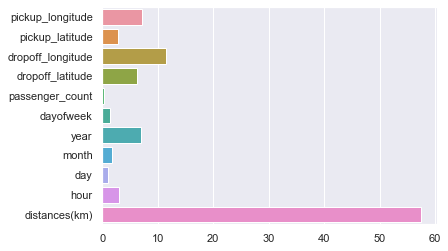

In [71]:
sns.barplot(model.get_feature_importance(verbose=True),y=nom_colonnes)